In [32]:
import os
import pandas as pd
import matplotlib as plt

%matplotlib inline

In [2]:
data_folder = 'data/'

for file in os.listdir(data_folder):
    filename = data_folder + file
    print(filename)

data/circuits.csv
data/status.csv
data/lap_times.csv
data/races.csv
data/constructors.csv
data/constructor_standings.csv
data/driver.csv
data/qualifying.csv
data/driver_standings.csv
data/constructor_results.csv
data/pit_stops.csv
data/seasons.csv
data/results.csv


In [17]:
# cols = ['qualifyId', 'raceId', 'driverId', 'constructorId', 'number', 'position', 'q1', 'q2', 'q3']
# cols = ['year', 'url']

cols_laps = ['raceId', 'driverId', 'lap', 'position', 'time', 'milliseconds']
df_laps = pd.read_csv('data/lap_times.csv', names=cols_laps)

cols_races = ['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'tod', 'url']
df_races = pd.read_csv('data/races.csv', names=cols_races)

cols_results = ['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid', 'position', 'positionText', 'positionOrder', 'points', 'laps', 'time', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId']
df_results = pd.read_csv('data/results.csv', names=cols_results)

cols_driver = ['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob', 'nationality', 'url']
df_driver = pd.read_csv('data/driver.csv', names=cols_driver)

In [4]:
df_laps.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [5]:
df_races.head()

,raceId,year,round,circuitId,name,date,tod,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [6]:
df_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [7]:
# df_merged = df_races.merge(df_laps, left_on=['raceId'], right_on=['raceId'], how='left')
df_merged = df_races.merge(df_results, left_on=['raceId'], right_on=['raceId'], how='left')
df_merged.head()

,raceId,year,round,circuitId,name,date,tod,url,resultId,driverId,...,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,7554.0,18.0,...,1.0,10.0,58.0,1:34:15.784,5655784,17,3,1:28.020,216.891,1.0
1,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,7555.0,22.0,...,2.0,8.0,58.0,+0.807,5656591,43,14,1:29.066,214.344,1.0
2,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,7556.0,15.0,...,3.0,6.0,58.0,+1.604,5657388,50,10,1:28.916,214.706,1.0
3,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,7557.0,10.0,...,4.0,5.0,58.0,+4.435,5660219,53,6,1:28.416,215.920,1.0
4,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,7558.0,4.0,...,5.0,4.0,58.0,+4.879,5660663,53,9,1:28.712,215.199,1.0


In [37]:
df_years = df_merged[df_merged.year >= 2000]
df_years.nunique()

raceId              394
year                 21
round                22
circuitId            34
name                 30
date                394
tod                  31
url                 394
resultId           7940
driverId            112
constructorId        34
number               47
grid                 25
position             25
positionText         30
positionOrder        24
points               27
laps                 79
time               3382
milliseconds       3420
fastestLap           78
rank                 26
fastestLapTime     5787
fastestLapSpeed    5904
statusId             98
dtype: int64

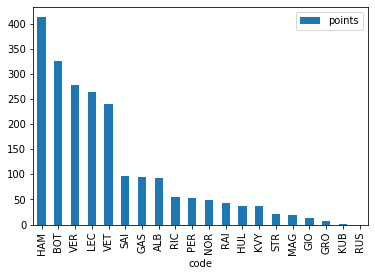

In [39]:
df_2019 = df_years[df_years.year == 2019].groupby(['year', 'driverId']).sum().sort_values(by=['points'], ascending=False)
df_2019 = df_2019[['constructorId', 'points']].merge(df_driver[['driverId', 'code']], left_on=['driverId'], right_on=['driverId'], how='left')
df_2019.plot.bar(x='code', y='points', rot=90)

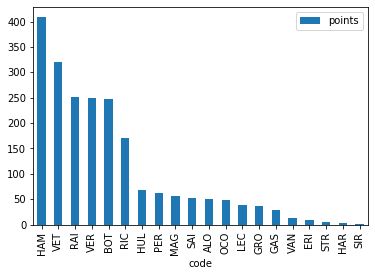

In [40]:
df_2019 = df_years[df_years.year == 2018].groupby(['year', 'driverId']).sum().sort_values(by=['points'], ascending=False)
df_2019 = df_2019[['constructorId', 'points']].merge(df_driver[['driverId', 'code']], left_on=['driverId'], right_on=['driverId'], how='left')
df_2019.plot.bar(x='code', y='points', rot=90)

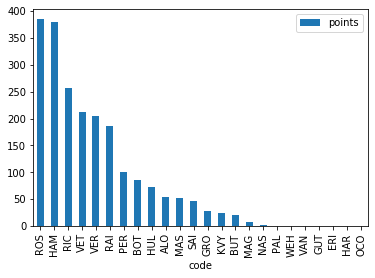

In [43]:
df_2019 = df_years[df_years.year == 2016].groupby(['year', 'driverId']).sum().sort_values(by=['points'], ascending=False)
df_2019 = df_2019[['constructorId', 'points']].merge(df_driver[['driverId', 'code']], left_on=['driverId'], right_on=['driverId'], how='left')
df_2019.plot.bar(x='code', y='points', rot=90)